In [182]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite

model = read_sbml_model('yeast8.xml')


In [7]:
pip install markupsafe==2.0.1

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for markupsafe: filename=MarkupSafe-2.0.1-py3-none-any.whl size=9767 sha256=6967e19d975402a30c227c2c7d7b2de686198b851716827eb5b92da855d57529
  Stored in directory: c:\users\pauli\appdata\local\pip\cache\wheels\ea\18\79\6266ea508b8164a77b95aa19534c77eb805f2878612c37efca
Successfully built markupsafe
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-server 2.22.0 requires jinja2>=3.0.3, but you have jinja2 2.11.3 which is incompatible.
jupyterlab-server 2.22.0 requires jsonschema>=4.17.3, but you have jsonschema 3.2.0 which is incompatible.
werkzeug 2.2.3 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [1]:
import cameo

In [225]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
fseof = FSEOF(model)
result = fseof.run(target = model.reactions.r_2104)
df = result.data_frame

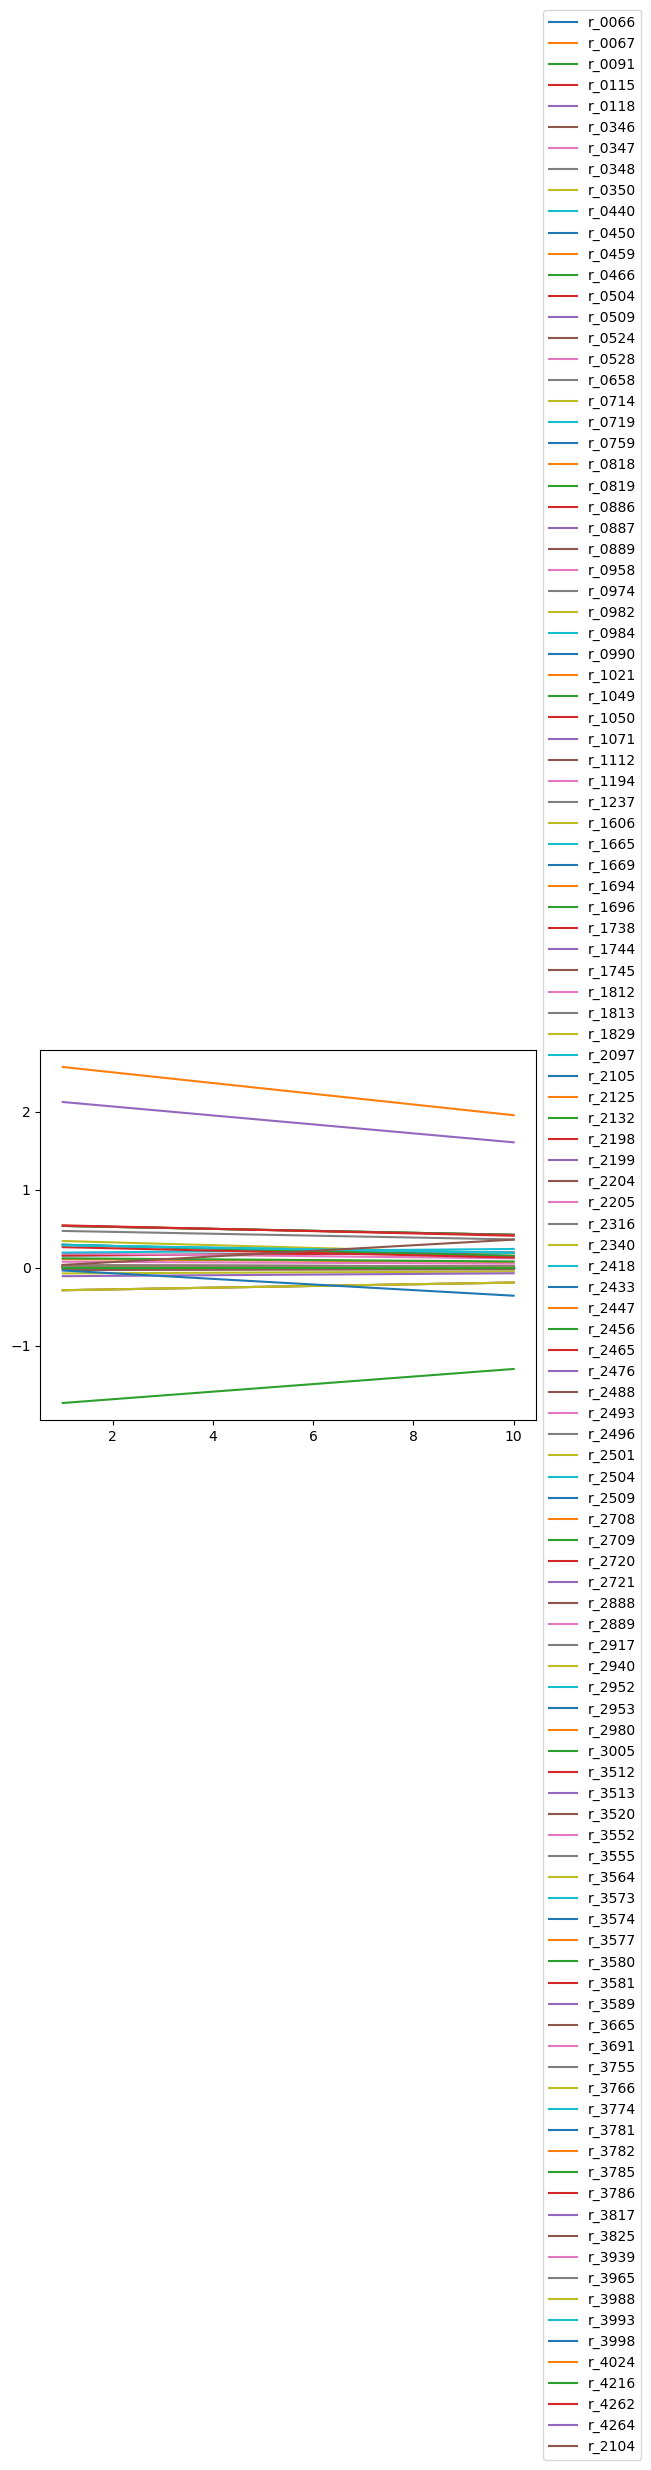

In [226]:
from matplotlib import pyplot as plt
df.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [157]:
# sorting the dataframe
df= df.sort_values([1], ascending = False)
 
from pytest import approx
# removing genes from dataframe 
removed_zero = (df != approx(0.0)).all(axis=1)
df = df.loc[removed_zero]
df.head()

,1,2,3,4,5,6,7,8,9,10
r_1021,2.288012,2.188333,2.088655,1.987184,1.884550,1.781915,1.679281,1.576646,1.474012,1.371378
r_4264,1.876845,1.797334,1.717822,1.634727,1.549304,1.463882,1.378459,1.293036,1.207613,1.122190
r_0091,0.579767,0.570466,0.561166,0.546489,0.528321,0.510153,0.491986,0.473818,0.455650,0.437482
r_0889,0.579767,0.570466,0.561166,0.546489,0.528321,0.510153,0.491986,0.473818,0.455650,0.437482
r_0466,0.579767,0.570466,0.561166,0.546489,0.528321,0.510153,0.491986,0.473818,0.455650,0.437482


In [148]:
import numpy as np

Text(0.5, 1.0, 'Flux scanning based on Enforced Objective Flux')

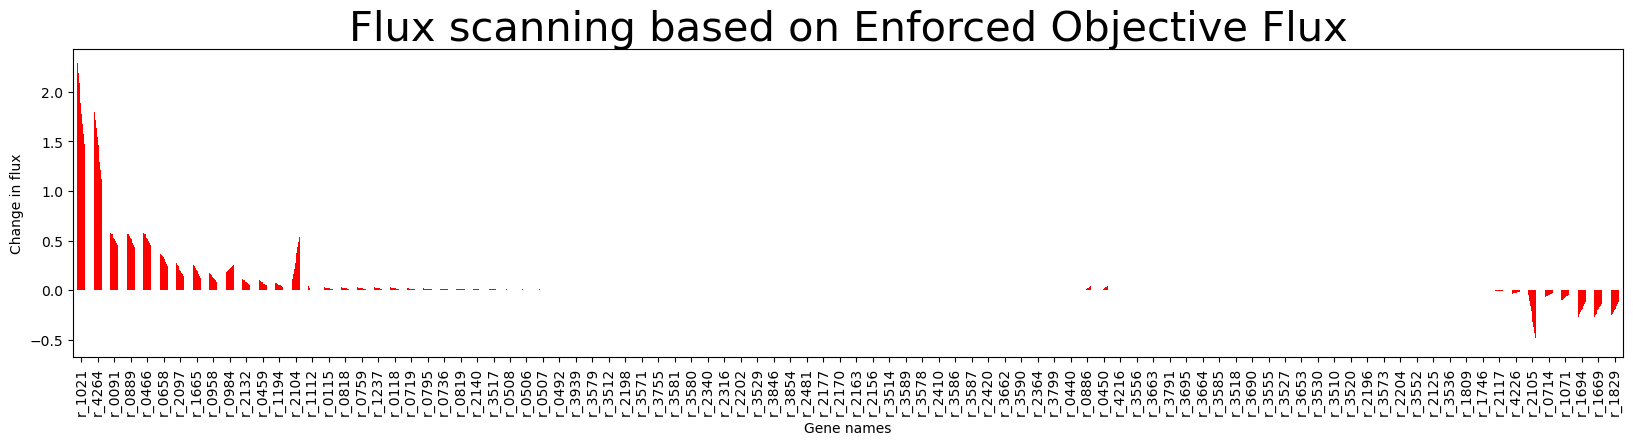

In [158]:

# def bar_color(df,color1,color2):
#     return np.where(df.values >=0,color1,color2).T

fig = df.plot(legend=None, kind='bar', color='red',figsize=(20, 4), grid =False);
# fig = df.plot(legend=None, kind='bar',figsize=(20, 4), grid =False);
fig.set_ylabel('Change in flux')
fig.set_xlabel('Gene names')
fig.set_title('Flux scanning based on Enforced Objective Flux', size=30)

In [233]:
# df['relative_change_in_flux'] = (df[10]-df[1])/df[10] +1
# target_reactions_df = df[df['relative_change_in_flux'] > 0.6]
# target_reactions_df

###################################

Keys = []
for row in range(len(df[1])):
        if df[1][row]==0.0:
            continue
        elif df[1][row]>df[10][row] and abs(df[1][row]-df[10][row])/abs(df[1][row])>0.5 and df[1][row]-df[10][row]>0.1:
            Keys.append(df.index[row])
Reactions=df.T[Keys].T.sort_values(by=[10])
Reactions



,1,2,3,4,5,6,7,8,9,10,Percent_change
r_2105,-0.054,-0.108,-0.162,-0.216,-0.27,-0.324,-0.378,-0.432,-0.486,-0.54,900.0


In [235]:
Keys = []
for row in range(len(df[1])):
    if abs(df[1][row])<abs(max(df.T[df.T.keys()[row]])) and df[1][row]*max(df.T[df.T.keys()[row]]):
        Keys.append(df.index[row])
Reactions

,1,2,3,4,5,6,7,8,9,10,Percent_change
r_2105,-0.054,-0.108,-0.162,-0.216,-0.27,-0.324,-0.378,-0.432,-0.486,-0.54,900.0


Text(0.5, 1.0, 'Reactions with a relative change in Flux > 0.6')

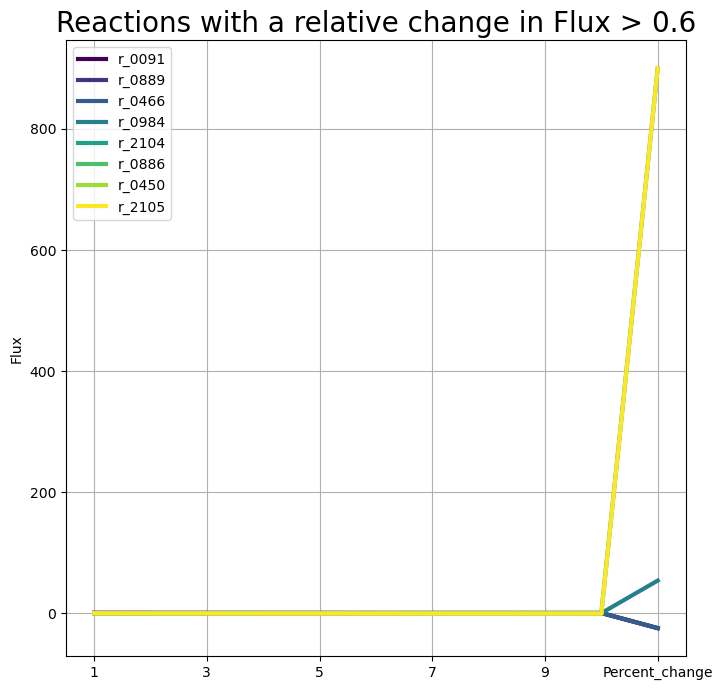

In [228]:
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 0.6', size=20)

In [172]:
xyodict = {1: "r_2104", # xylitol transport
           2: "r_1719", # D-xylose transport
           3: "r_1093", # xylose reductase
           4: "r_1092", # xylitol dehydrogenase
           5: "r_0889", # 6-phosphogluconate dehydrogenase
           6: "r_0466", # Glucose-6-phosphate dehydrogenase
          }

In [229]:
with model:

    medium_mod = model.medium # 50% glucose and 50% xylose as carbon sources in the medium
    
    medium_mod['r_1714'] = 0.3
    medium_mod['r_1718'] = 0.7
    model.medium = medium_mod

    #BUILD THE MUTANTS
    model.reactions.r_1050.bounds = (-10,0)
    model.reactions.r_0091.bounds = (-10,0)
    model.reactions.r_0466.bounds = (-10,0)
    model.reactions.r_0889.bounds = (-10,0)
    model.reactions.r_0984.bounds = (-10,0)
    model.reactions.r_2104.bounds = (0, 10)
    model.reactions.r_0440.bounds = (-10,0)
    model.reactions.r_4216.bounds = (0,10)
    model.reactions.r_2105.bounds = (-10,0) # regulation for xylose transporter
    model.reactions.r_1128.bounds = (-10,0)

    model.reactions.r_1719.bounds = (0,10)
    model.reactions.r_1093.bounds = (0,10) # regulation for xylose reductase
    model.genes.YLR070C.knock_out() # knockout for xylitol dehydrogenase
    model.reactions.r_2104.bounds = (0,10) # regulation for xylitol transporter
    model.reactions.r_0889.bounds = (0,10) # 6-phosphogluconate dehydrogenase
    model.reactions.r_0466.bounds = (0,10) # Glucose-6-phosphate dehydrogenase

    
    with model:
        model.objective = model.reactions.r_2111  # Assuming XYLR is the reaction for xylitol production
        growth = model.optimize().objective_value
    print('Maximum theoretical cell growth:', growth, 'mmol/gDW*h')

   
    with model:
        model.objective = model.reactions.r_2104  # Assuming XYLR is the reaction for xylitol production
        xylitol_production = model.optimize().objective_value
        for key in xyodict.keys():
            print(model.reactions.get_by_id(xyodict[key]).name, model.reactions.get_by_id(xyodict[key]).flux)
    print('Maximum theoretical productivity of xylitol:', xylitol_production, 'mmol/gDW*h')
  

Maximum theoretical cell growth: 0.022407517066531976 mmol/gDW*h
xylitol exchange 0.6999999999999998
D-xylose transport 0.6999999999999997
xylose reductase 0.6999999999999997
xylitol dehydrogenase (D-xyulose-forming) 0.0
phosphogluconate dehydrogenase 0.0
glucose 6-phosphate dehydrogenase 0.0
Maximum theoretical productivity of xylitol: 0.6999999999999998 mmol/gDW*h
